In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tran = [['A', 'B','C','D','E'],
        ['B','C'],
        ['A', 'B', 'F'],
        ['A','B','G'],
        ['A','F','H']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# TransactionEncoder 객체를 생성
te = TransactionEncoder()

# TransactionEncoder를 학습 데이터(tran)에 적용하여 트랜잭션 데이터를 이진화하고 변환된 배열을 생성
tran_ar = te.fit(tran).transform(tran)

# 이진화된 트랜잭션 데이터 배열 출력
print(tran_ar)

# 열 이름(항목 이름)을 출력
print(te.columns_)


[[ True  True  True  True  True False False False]
 [False  True  True False False False False False]
 [ True  True False False False  True False False]
 [ True  True False False False False  True False]
 [ True False False False False  True False  True]]
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 이진화된 트랜잭션 데이터 배열을 사용하여 새로운 Pandas 데이터프레임 생성
df = pd.DataFrame(tran_ar, columns=te.columns_)

# 생성된 데이터프레임 출력
print(df)


       A      B      C      D      E      F      G      H
0   True   True   True   True   True  False  False  False
1  False   True   True  False  False  False  False  False
2   True   True  False  False  False   True  False  False
3   True   True  False  False  False  False   True  False
4   True  False  False  False  False   True  False   True


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 데이터프레임(df)의 각 열(axis=0)에 대해 빈도를 계산하고 'Frequency'라는 열 이름을 가진 새로운 데이터프레임 생성
freq = df.sum().to_frame('Frequency')

# 'Frequency' 열을 기준으로 빈도를 내림차순으로 정렬한 새로운 데이터프레임 생성
freq_sort = freq.sort_values('Frequency', ascending=False)

# 정렬된 데이터프레임 출력
print(freq_sort)


   Frequency
A          4
B          4
C          2
F          2
D          1
E          1
G          1
H          1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
freq_sort['Support'] = freq_sort['Frequency'] / len(tran)
print(freq_sort)

   Frequency  Support
A          4      0.8
B          4      0.8
C          2      0.4
F          2      0.4
D          1      0.2
E          1      0.2
G          1      0.2
H          1      0.2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: title={'center': 'Frequent items'}>

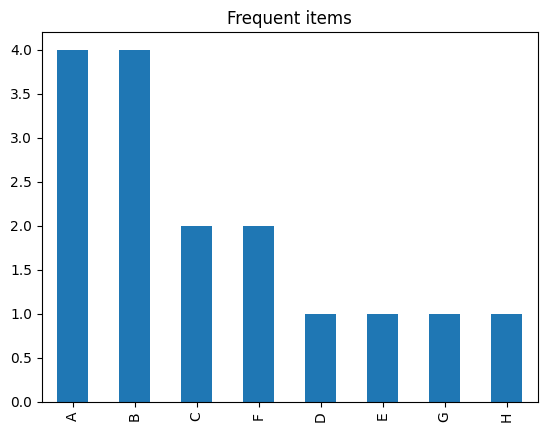

In [ ]:
freq_sort['Frequency'].plot(kind='bar', title="Frequent items")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

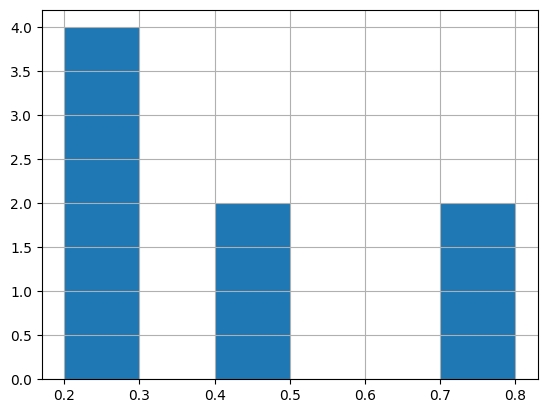

In [ ]:
freq_sort['Support'].hist(bins=6)

In [ ]:
freq_items = apriori(df, min_support=0.4, use_colnames=True)
print(freq_items)

   support itemsets
0      0.8      (A)
1      0.8      (B)
2      0.4      (C)
3      0.4      (F)
4      0.6   (A, B)
5      0.4   (A, F)
6      0.4   (C, B)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 데이터프레임 freq_items를 사용하여 연관 규칙 생성
# metric="confidence"은 연관 규칙의 평가 지표로 신뢰도를 사용하고, min_threshold=0.7은 최소 신뢰도 임계값을 설정합니다.
rules = association_rules(freq_items, metric="confidence", min_threshold=0.7)

# 생성된 연관 규칙을 출력
rules


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(A),(B),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8,-0.250000
1,(B),(A),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8,-0.250000
2,(F),(A),0.4,0.8,0.4,1.00,1.2500,0.08,inf,0.333333
3,(C),(B),0.4,0.8,0.4,1.00,1.2500,0.08,inf,0.333333


In [ ]:
# 'lift' 값이 1보다 큰 연관 규칙을 선택
rules = rules[rules['lift'] > 1]

# 선택된 연관 규칙을 신뢰도(Confidence)에 따라 내림차순으로 정렬
rules = rules.sort_values(by='confidence', ascending=False)

# 정렬된 연관 규칙을 출력
rules


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(F),(A),0.4,0.8,0.4,1.0,1.25,0.08,inf,0.333333
3,(C),(B),0.4,0.8,0.4,1.0,1.25,0.08,inf,0.333333


In [ ]:
# "antecedents" 열에 포함된 항목 중에서 'F'가 포함된 항목을 찾아서 선택
filtered_rules = rules[rules.antecedents.apply(lambda x: 'F' in x)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(F),(A),0.4,0.8,0.4,1.0,1.25,0.08,inf,0.333333


In [ ]:
rules[rules.consequents.apply(lambda x: 'B' in x)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(C),(B),0.4,0.8,0.4,1.0,1.25,0.08,inf,0.333333
